# Reasoning and Decision Making under Uncertainty - Worksheet 1

Teammates




## Exercise 1

### Multinomial distributed random numbers

- a) Create a multinomial distribution from the example file anthrokids.csv: Use the column age and round the floating point values to obtain integers. Count the frequencies of the integers and use them as basis of the distribution.
- b) Sample from the multinomial distribution.
- c) How can you check if your samples really follow the distribution from 1 a) ?


a) Create a multinomial distribution from the example file anthrokids.csv: Use the column age and round the floating point values to obtain integers. Count the frequencies of the integers and use them as basis of the distribution.


In [69]:
# a) Create a multinomial distribution from the example file anthrokids.csv: Use the column age and round the floating point values to obtain integers. Count the frequencies of the integers and use them as basis of the distribution.

import pandas as pd

df = pd.read_csv('data/anthrokids.csv')
df

,id,mass,height,waist,foot,sittingHeight,upperLegLength,kneeHeight,forearmLength,age,gender,handedness,birthOrder
0,1,15.5,103.3,47.5,16.3,582.0,306.0,NaN,259.0,4.219,F,right,1.0
1,2,17.6,103.9,49.8,16.3,606.0,311.0,NaN,274.0,4.326,M,right,1.0
2,3,23.0,111.2,52.0,17.1,594.0,387.0,NaN,304.0,4.476,F,right,1.0
3,4,16.5,99.7,49.1,16.3,542.0,312.0,NaN,281.0,3.841,F,both,1.0
4,5,15.0,99.7,46.5,16.7,524.0,321.0,NaN,269.0,3.460,F,both,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,91096,16.0,103.6,48.7,16.5,597.0,307.0,307.0,269.0,3.403,M,both,2.0
3896,91097,14.3,99.9,46.0,15.1,582.0,291.0,275.0,253.0,3.397,M,left,4.0
3897,91099,12.4,90.5,47.6,14.1,537.0,289.0,254.0,224.0,2.442,F,right,1.0
3898,91100,18.4,100.7,55.1,16.1,570.0,320.0,303.0,273.0,4.188,M,right,1.0


In [70]:
# data cleaning
df.isnull().sum()

id                  0
mass                4
height              6
waist              80
foot               62
sittingHeight      42
upperLegLength     28
kneeHeight        212
forearmLength      69
age                 2
gender              0
handedness        115
birthOrder        165
dtype: int64

In [71]:
df.dropna(inplace=True)
df.isnull().sum()

id                0
mass              0
height            0
waist             0
foot              0
sittingHeight     0
upperLegLength    0
kneeHeight        0
forearmLength     0
age               0
gender            0
handedness        0
birthOrder        0
dtype: int64

In [72]:
# Round the age column to integers and count the frequencies
df["age_rounded"] = df["age"].round().astype(int)
df["age_rounded"].value_counts().sort_index()

age_rounded
2      42
3     110
4     156
5     207
6     193
7     204
8     181
9     245
10    247
11    267
12    267
13    288
14    250
15    257
16    179
17    206
18    134
19     17
20      1
Name: count, dtype: int64

- Multinomial distribution: The multinomial distribution is a probability distribution that describes the outcomes of experiments where each trial can result in one of multiple categories, and each category has a specific probability of occurrence


In [73]:
total_number_of_observations = df["age_rounded"].count()
total_number_of_observations

3451

In [74]:
df2 = pd.DataFrame()
df2["ages"] = df["age_rounded"].value_counts().sort_index().index
df2["age_frequencies"] = df["age_rounded"].value_counts().sort_index().values
df2["age_probabilities"] = df2["age_frequencies"] / total_number_of_observations
df2

,ages,age_frequencies,age_probabilities
0,2,42,0.012170
1,3,110,0.031875
2,4,156,0.045204
3,5,207,0.059983
4,6,193,0.055926
5,7,204,0.059113
6,8,181,0.052449
7,9,245,0.070994
8,10,247,0.071573
9,11,267,0.077369


In [75]:
sum(df2["age_probabilities"])

0.9999999999999999

In [76]:
# create the ages list of number of frequencies
age_list = []

for index, row in df2.iterrows():
    age = row["ages"]
    frequency = row["age_frequencies"].astype(int)
    age_list += [age] * frequency

len(age_list)

3451

In [77]:
from helpers import randint

seed = 42
a = 214013
c = 2531011
m = 2**32

random_number, _ = randint(seed, a, c, m)
random_number % total_number_of_observations

119

b) Sample from the multinomial distribution.


In [78]:
samples = 10 ** 5
age_samples = []

for i in range(samples):
    random_number, _ = randint(seed, a, c, m)
    seed = random_number
    index = random_number % total_number_of_observations
    age_samples.append(age_list[index])

len(age_samples)

100000

c) How can you check if your samples really follow the distribution from 1 a) ?


In [79]:
df3 = pd.DataFrame(age_samples, columns=["age"])

age_df = pd.DataFrame()

age_df["ages_sample"] = df3["age"].value_counts().sort_index().index
age_df["age_sample_frequencies"] = df3["age"].value_counts().sort_index().values
age_df["age_sample_probabilities"] = age_df["age_sample_frequencies"] / samples
age_df["age_probabilities"] = df2["age_probabilities"]
age_df["difference"] = age_df["age_probabilities"] - \
    age_df["age_sample_probabilities"]
age_df

,ages_sample,age_sample_frequencies,age_sample_probabilities,age_probabilities,difference
0,2.0,1238,0.01238,0.012170,-0.000210
1,3.0,3137,0.03137,0.031875,0.000505
2,4.0,4503,0.04503,0.045204,0.000174
3,5.0,5982,0.05982,0.059983,0.000163
4,6.0,5590,0.05590,0.055926,0.000026
5,7.0,5884,0.05884,0.059113,0.000273
6,8.0,5074,0.05074,0.052449,0.001709
7,9.0,7194,0.07194,0.070994,-0.000946
8,10.0,7155,0.07155,0.071573,0.000023
9,11.0,7654,0.07654,0.077369,0.000829


In [80]:
print("Sum of age_probabilities: ", sum(age_df["age_probabilities"]))
print("Sum of age_sample_probabilities: ",
      sum(age_df["age_sample_probabilities"]))

Sum of age_probabilities:  0.9999999999999999
Sum of age_sample_probabilities:  1.0000000000000002


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

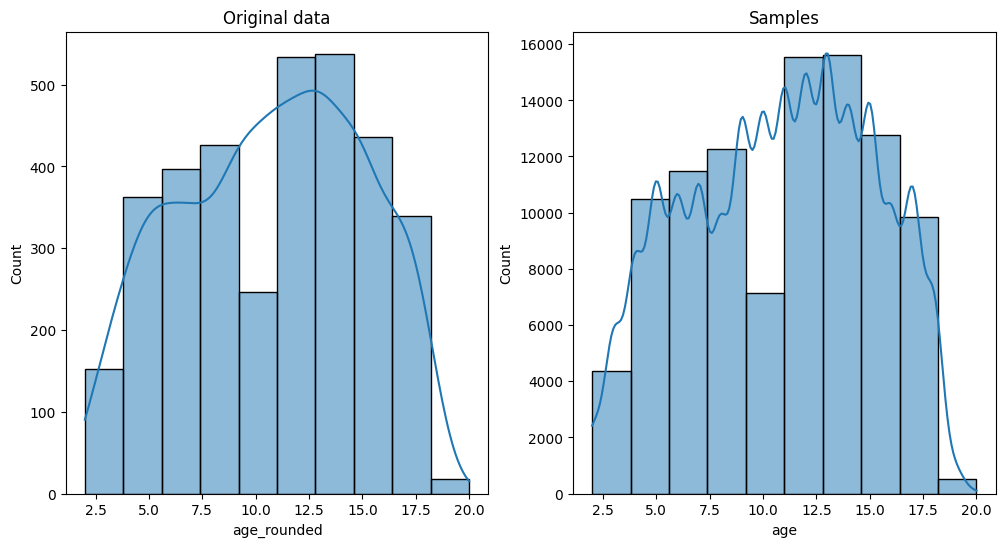

In [81]:
# Histogram of the age samples
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df["age_rounded"], kde=True, ax=axs[0], bins=10)
axs[0].set_title("Original data")

sns.histplot(df3["age"], kde=True, ax=axs[1], bins=10)
axs[1].set_title("Samples")

plt.show()

We can see it is following original distribution


## Exercise 2

### Uniformly distributed random numbers

- a) Implement a way to generate uniformly distributed one-dimensional random numbers. Make sure that your implementation can be parametrized.
- b) Use the random number generator from 2 a) to create a sample set of random numbers. Estimate the parameters of the underlying uniform distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?
- c) How can you check if your random numbers really follow the distribution from 2 a)?


a) Implement a way to generate uniformly distributed one-dimensional random numbers. Make sure that your implementation can be parametrized.


In [2]:
from helpers import randint

seed = 42
a = 214013
c = 2531011
m = 2**32
upper_bound = 100
lower_bound = 1


def scale_to_range(number, upper_bound, lower_bound):
    return lower_bound + (upper_bound - lower_bound) * number


for i in range(10):
    seed, random_number = randint(seed, a, c, m)

    #  scale the random number to the range of the upper and lower bounds
    scaled_number = scale_to_range(random_number, upper_bound, lower_bound)
    print(scaled_number.__round__(3))

1.266
1.605
27.994
46.404
25.296
69.957
13.11
62.047
24.882
53.173


b) Use the random number generator from 2 a) to create a sample set of random numbers. Estimate the parameters of the underlying uniform distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?


In [9]:
import pandas as pd
from helpers import max_value, min_value
sample_size = [100, 1000, 10000, 100000, 1000000, 10000000]

results_df = pd.DataFrame()

for size in sample_size:

    data_list = []
    df_list = []
    estimated_lower_bound = 0
    estimated_upper_bound = 0

    for i in range(size):
        seed, random_number = randint(seed, a, c, m)
        scaled_number = scale_to_range(random_number, upper_bound, lower_bound)
        data_list.append(scaled_number)

    estimated_lower_bound = min_value(data_list)
    estimated_upper_bound = max_value(data_list)

    error_in_lower_bound = abs(lower_bound - estimated_lower_bound)
    error_in_upper_bound = abs(upper_bound - estimated_upper_bound)

    df_list.append(pd.DataFrame({"Actual Upper Bound": upper_bound,
                                 "Estimated Upper Bound": estimated_upper_bound,
                                 "Error in Upper Bound": error_in_upper_bound,
                                 "Actual lower Bound": lower_bound,
                                 "Estimated lower Bound": estimated_lower_bound,
                                 "Error in lower Bound": error_in_lower_bound,
                                 }, index=[size]))
    results_df = pd.concat([results_df, pd.concat(df_list)])

results_df

,Actual Upper Bound,Estimated Upper Bound,Error in Upper Bound,Actual lower Bound,Estimated lower Bound,Error in lower Bound
100,100,98.268185,1.731815,1,1.020270,2.026971e-02
1000,100,99.999397,0.000603,1,1.090037,9.003682e-02
10000,100,99.979405,0.020595,1,1.015049,1.504945e-02
100000,100,99.997128,0.002872,1,1.000265,2.650546e-04
1000000,100,99.999951,0.000049,1,1.000440,4.396141e-04
10000000,100,99.999999,0.000001,1,1.000000,1.613516e-07


"From the above table, we can see that the upper and lower bound errors decrease as the sample size increases."


c) How can you check if your random numbers really follow the distribution from 2 a)?


100


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


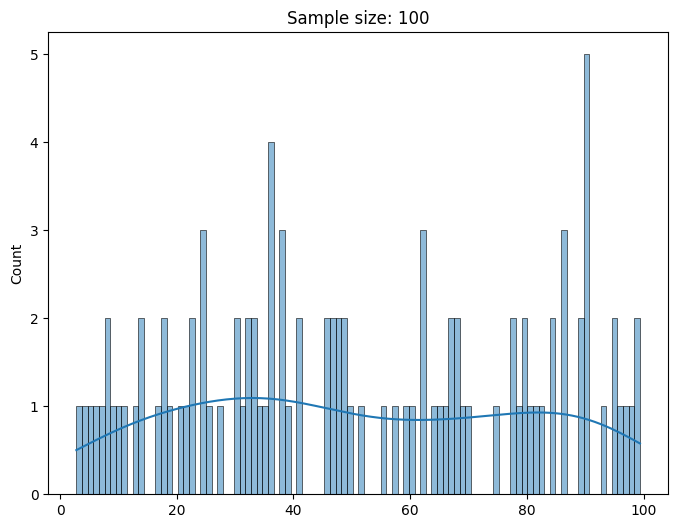

1000


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


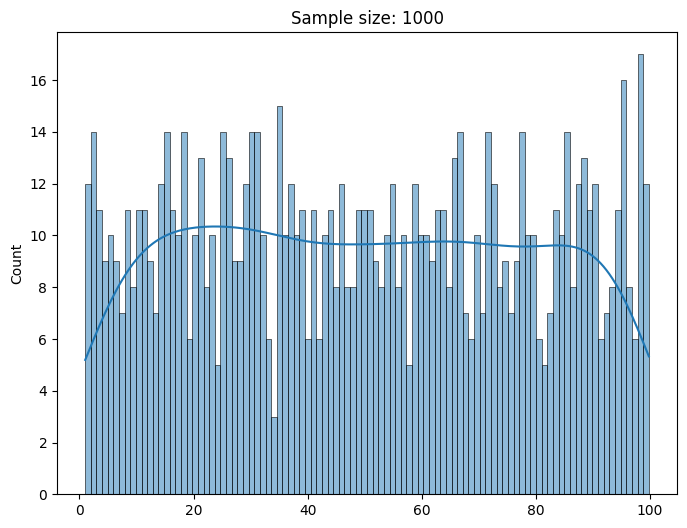

10000


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


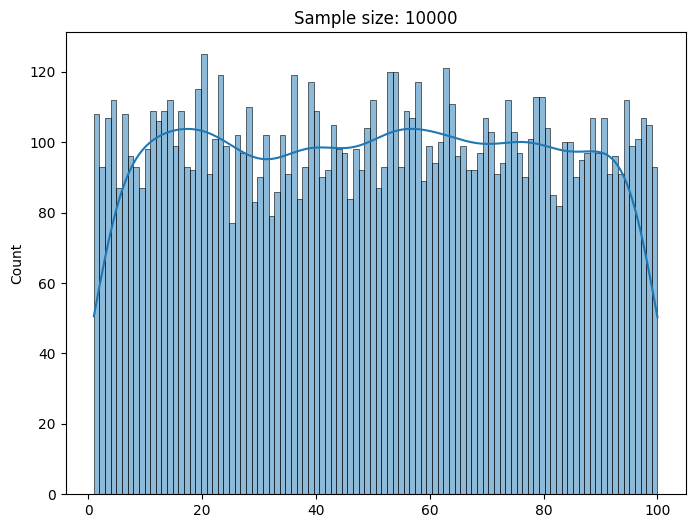

100000


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


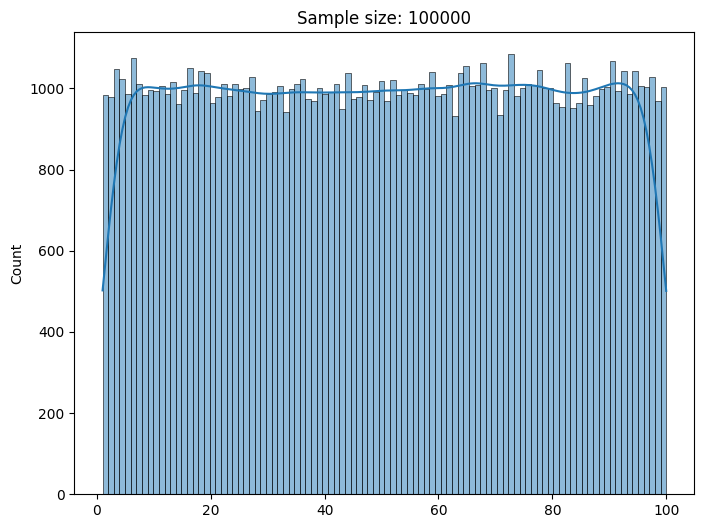

1000000


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


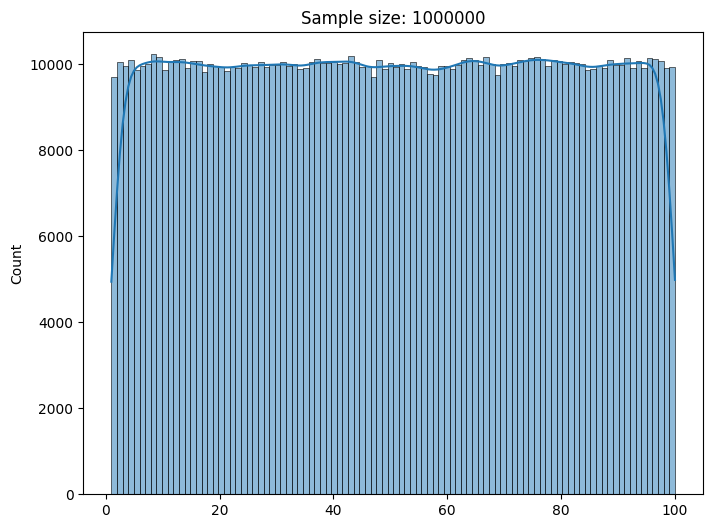

10000000


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


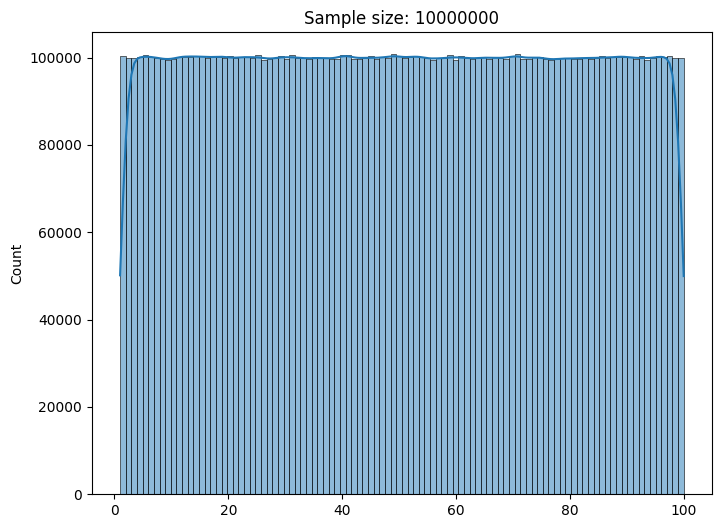

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for size in sample_size:

    data_list = []

    for i in range(size):
        seed, random_number = randint(seed, a, c, m)
        scaled_number = scale_to_range(random_number, upper_bound, lower_bound)
        data_list.append(scaled_number)

    plt.figure(figsize=(8, 6))
    sns.histplot(data_list, kde=True, bins=100)
    plt.title(f"Sample size: {size}")
    plt.show()

## Exercise 3

### Normally distributed random numbers

- a) Implement a way to generate normally distributed one-dimensional random numbers with mean 0 and standard deviation of 1.0.
- b) Use the random number generator from 3 a) to create a sample set of random numbers. Estimate the parameters of the underlying normal distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?
- c) How can you check if your random numbers really follow the distribution from 3 a)?


a) Implement a way to generate normally distributed one-dimensional random numbers with mean 0 and standard deviation of 1.0.

- Box-Muller method: calculate two independent, standard-normal distributed random numbers

        Z0 = cos(2 * pi * U1) * sqrt(-2 * ln(U2))

        Z1 = sin(2 * pi * U1) * sqrt(-2 * ln(U2))


In [83]:
from helpers import randint
import numpy as np
import pandas as pd

seed1 = 42
seed2 = 26
a = 214013
c = 2531011
m = 2**32


def box_muller(seed1, seed2):
    seed1, u1 = randint(seed1, a, c, m)
    seed2, u2 = randint(seed2, a, c, m)

    z1 = np.cos(2 * np.pi * u1) * np.sqrt(-2 * np.log(u2))
    z2 = np.sin(2 * np.pi * u1) * np.sqrt(-2 * np.log(u2))

    return seed1, seed2, z1, z2


df_list = []
for i in range(10):
    seed1, seed2, z1, z2 = box_muller(seed1, seed2)
    df_list.append(pd.DataFrame({"z1": [z1], "z2": [z2]}))

df = pd.concat(df_list, ignore_index=True)
df

,z1,z2
0,3.541787,0.059692
1,1.386319,0.053274
2,-0.061180,0.426647
3,-1.002644,0.266704
4,0.022998,0.797847
5,-0.257051,-0.736159
6,1.024216,0.990322
7,-1.104777,-0.994426
8,0.097282,1.763820
9,-2.635809,-0.451545


- b) Use the random number generator from 3 a) to create a sample set of random numbers. Estimate the parameters of the underlying normal distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?


In [84]:
from helpers import mean, std_dev
import pandas as pd

sample_size = [100, 1000, 10000, 100000, 1000000]

result_df = pd.DataFrame()

for size in sample_size:
    data_list = []
    seed1 = 42
    seed2 = 26

    df_list = []
    for i in range(size):
        seed1, seed2, z1, z2 = box_muller(seed1, seed2)
        data_list.append(z1)
        data_list.append(z2)

    estimated_mean_val = mean(data_list)
    std_dev_val = std_dev(data_list)

    mean_error = abs(estimated_mean_val - 0)
    std_dev_error = abs(std_dev_val - 1)

    df_list.append(pd.DataFrame({"Actual mean": 0,
                                 "Estimated mean": estimated_mean_val,
                                 "mean_error": mean_error,
                                 "Actual std_dev": 1,
                                 "Estimated std_dev": std_dev_val,
                                 "std_dev_error": std_dev_error},
                                index=[size]))

    result_df = pd.concat([result_df, pd.concat(df_list)], axis=0)

result_df

,Actual mean,Estimated mean,mean_error,Actual std_dev,Estimated std_dev,std_dev_error
100,0,0.002847,0.002847,1,1.079857,0.079857
1000,0,0.025754,0.025754,1,1.024705,0.024705
10000,0,-0.001410,0.001410,1,1.000592,0.000592
100000,0,-0.003144,0.003144,1,1.001150,0.001150
1000000,0,-0.000259,0.000259,1,1.000238,0.000238


"From the above table, we can see that the mean and standard deviation errors decrease as the sample size increases."


- c) How can you check if your random numbers really follow the distribution from 3 a)?


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


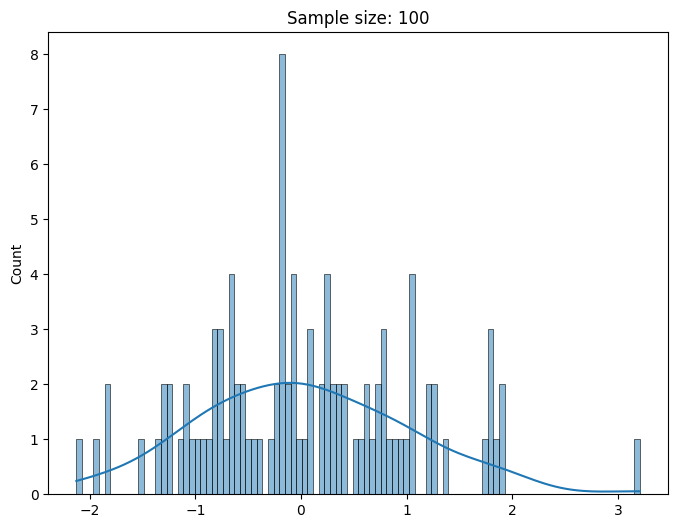

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


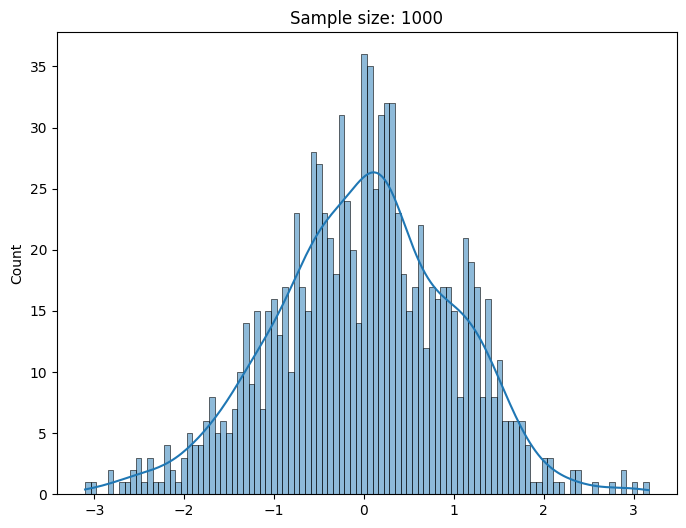

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


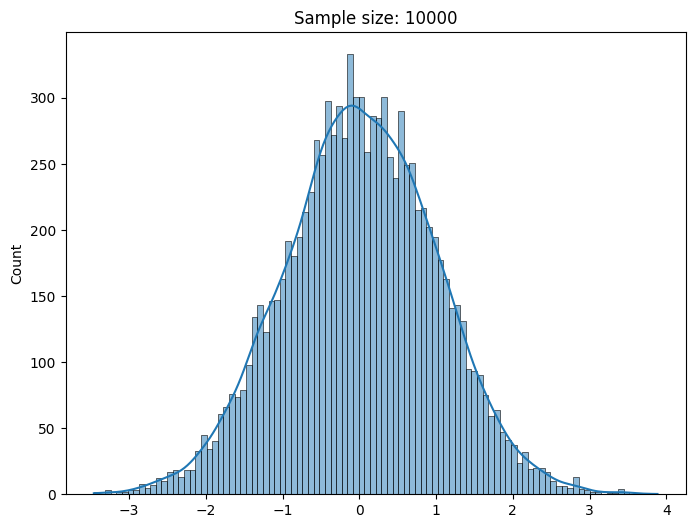

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


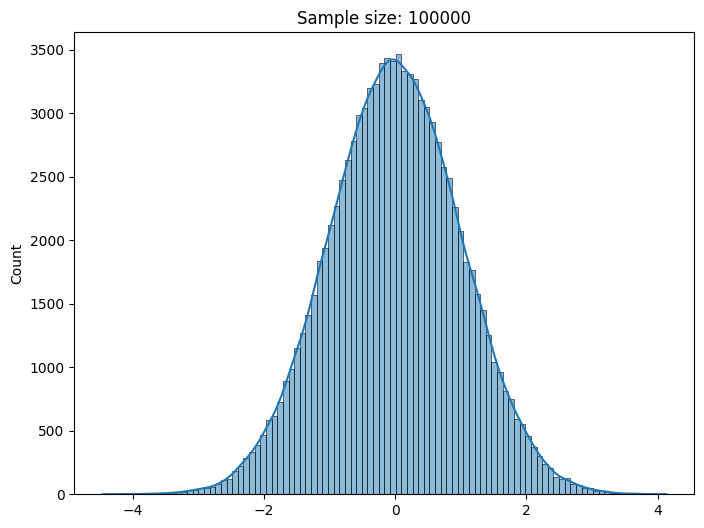

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


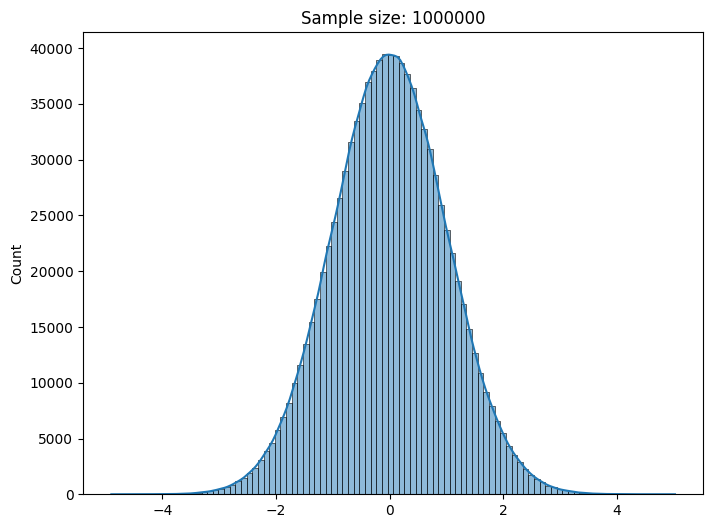

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

for size in sample_size:
    data_list = []

    for i in range(size):
        seed1, seed2, z1, z2 = box_muller(seed1, seed2)
        data_list.append(z1)

    plt.figure(figsize=(8, 6))
    sns.histplot(data_list, kde=True, bins=100)
    plt.title(f"Sample size: {size}")
    plt.show()

## Exercise 4

### Eponentially distributed random numbers

- a) Implement a way to generate exponentially distributed one-dimensional random numbers. Make sure that your implementation can be parametrized.
- b) Use the random number generator from 4 a) to create a sample set of random numbers. Estimate the parameters of the underlying exponential distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?
- c) How can you check if your random numbers really follow the distribution from 4 a)?


a) Implement a way to generate exponentially distributed one-dimensional random numbers. Make sure that your implementation can be parametrized.

- To generate exponentially distributed random numbers, we can use the inverse transform method. This method relies on the fact that if U is a uniform random variable on the interval [0, 1], then −1/λ \* ​ln(U) follows an exponential distribution with rate parameter λ.


In [86]:
import numpy as np
import pandas as pd
from helpers import randint


def exponential_distribution(x, λ):
    return -(1 / λ) * np.log(x)


seed = 42
a = 214013
c = 2531011
m = 2**32
λ = 0.5

for i in range(10):
    seed,  u = randint(seed, a, c, m)
    exponential_number = exponential_distribution(u, λ)
    print(exponential_number.__round__(4))

11.8423
10.1947
2.599
1.5591
2.8096
0.7233
4.2022
0.9669
2.844
1.2811


b) Use the random number generator from 4 a) to create a sample set of random numbers. Estimate the parameters of the underlying exponential distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?


In [87]:
from helpers import mean, std_dev
import pandas as pd


sample_size = [100, 1000, 10000, 100000, 1000000]
result_df = pd.DataFrame()

for size in sample_size:
    data_list = []
    df_list = []
    seed = 42

    for i in range(size):
        seed, u = randint(seed, a, c, m)
        z = exponential_distribution(u, λ)

        data_list.append(z)

    # For the exponential distribution, the mean is 1/λ and the standard deviation is 1/λ
    estimated_lambda = 1 / mean(data_list)

    error_lambda = abs(estimated_lambda - λ)

    df_list.append(pd.DataFrame({"lambda": λ,
                                 "estimated_lambda": estimated_lambda,
                                 "error_lambda": error_lambda},
                                index=[size]))

    result_df = pd.concat([result_df, pd.concat(df_list)], axis=0)

result_df

,lambda,estimated_lambda,error_lambda
100,0.5,0.446777,0.053223
1000,0.5,0.481672,0.018328
10000,0.5,0.501714,0.001714
100000,0.5,0.499103,0.000897
1000000,0.5,0.500562,0.000562


"From the above results, we can see that the estimated lambda is very close to the actual lambda value of 0.5. The error in the estimation decreases as the sample size increases."


c) How can you check if your random numbers really follow the distribution from 4 a)?


c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


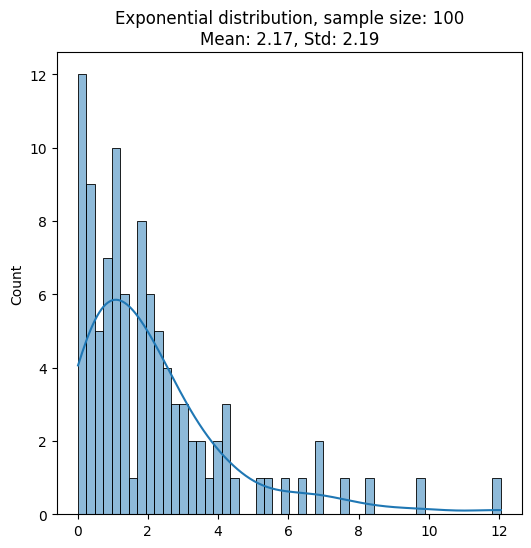

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


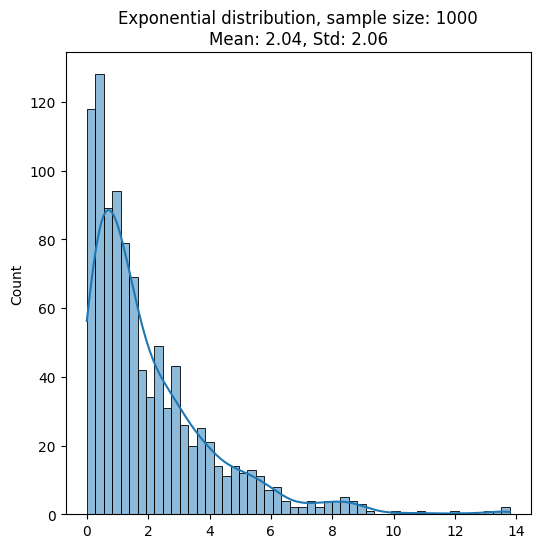

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


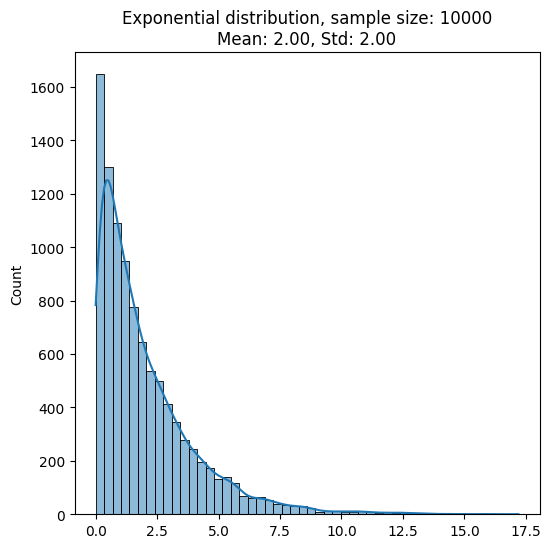

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


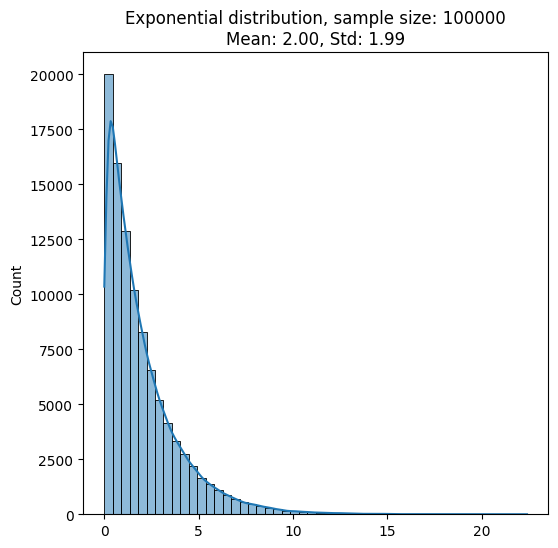

c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


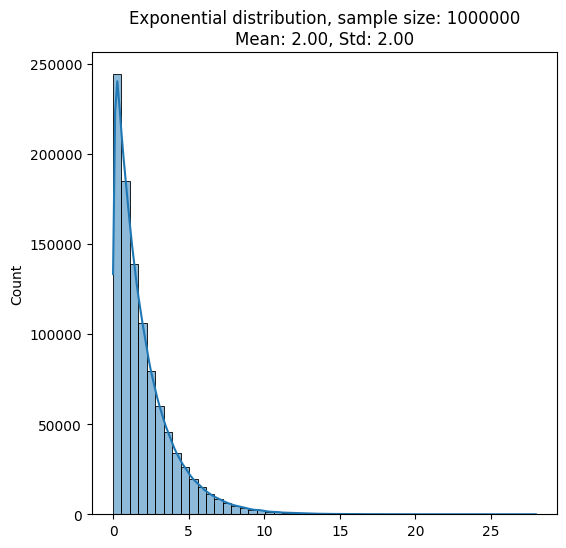

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

for size in sample_size:
    x_list = []

    for i in range(size):
        seed, u = randint(seed, a, c, m)
        x = exponential_distribution(u, λ)
        x_list.append(x)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    sns.histplot(x_list, kde=True, ax=ax, bins=50)
    mean_x = mean(x_list)
    std_dev_x = std_dev(x_list)
    ax.set_title(
        f"Exponential distribution, sample size: {size}\nMean: {mean_x:.2f}, Std: {std_dev_x:.2f}")

    plt.show()